<a href="https://colab.research.google.com/github/saqibmanzar/Macine-Translation/blob/main/Lab_2_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Basic Linear Recurrent Neural Network from Scratch

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np

In [ ]:
# Following code snippet generates a binary sequence.  
num_samples = 20
sequence_len = 10
#Train Sequences
X = np.zeros((num_samples, sequence_len))
for row_idx in range(num_samples):
    X[row_idx,:] = np.around(np.random.rand(sequence_len)).astype(int)
print(X)

Y = np.sum(X, axis=1)
print(Y)


[[0. 1. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 1. 0. 1. 0. 1. 0. 0.]
 [1. 1. 0. 1. 1. 1. 0. 0. 0. 1.]
 [0. 0. 1. 1. 1. 0. 1. 1. 0. 1.]
 [1. 1. 0. 1. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 1. 0. 1. 1.]
 [0. 0. 1. 0. 0. 1. 1. 1. 1. 1.]
 [1. 0. 0. 1. 0. 0. 1. 0. 1. 1.]
 [1. 1. 1. 0. 0. 1. 0. 1. 1. 1.]
 [0. 1. 0. 1. 0. 0. 1. 1. 0. 1.]
 [0. 1. 1. 0. 1. 1. 0. 1. 1. 1.]
 [0. 0. 1. 1. 0. 1. 1. 1. 1. 0.]
 [0. 0. 0. 0. 1. 1. 1. 1. 0. 0.]
 [1. 1. 1. 0. 1. 0. 1. 0. 1. 1.]
 [1. 0. 0. 0. 0. 0. 0. 1. 1. 0.]
 [0. 1. 1. 0. 0. 1. 0. 1. 1. 1.]
 [0. 0. 1. 1. 0. 0. 0. 0. 1. 1.]
 [0. 1. 1. 0. 1. 1. 1. 0. 0. 0.]
 [1. 0. 1. 0. 0. 1. 0. 1. 1. 1.]
 [0. 0. 1. 1. 1. 1. 0. 0. 1. 1.]]
[2. 4. 6. 6. 4. 4. 6. 5. 7. 5. 7. 6. 4. 7. 3. 6. 4. 5. 6. 6.]


Ques 1. Performing forward and backward pass

In [ ]:
# Performing the forward pass
def forward_pass(arr_x, w_x, w_Rec):

   #Here we'll update the hidden state using update_state function
    hidden_state = np.zeros((arr_x.shape[0], arr_x.shape[1]+1))
    for n in range(0, arr_x.shape[1]):
        hidden_state[:,n+1] = update_state(arr_x[:,n], hidden_state[:,n], w_x, w_Rec)
    return hidden_state

def update_state(xk, sk, w_x, w_Rec): #for updating the current state
    return xk * w_x + sk * w_Rec

def loss(y, t): #implementing the loss function for MSE
    return np.mean((t - y)**2)


In [ ]:
w_x = -1.5
w_Rec = 2 

In [ ]:
hidden_x = forward_pass(X, w_x, w_Rec)
print(hidden_x)

[[    0.      0.     -1.5    -3.     -6.    -12.    -24.    -48.    -96.
   -192.   -385.5]
 [    0.      0.     -1.5    -3.     -7.5   -15.    -31.5   -63.   -127.5
   -255.   -510. ]
 [    0.     -1.5    -4.5    -9.    -19.5   -40.5   -82.5  -165.   -330.
   -660.  -1321.5]
 [    0.      0.      0.     -1.5    -4.5   -10.5   -21.    -43.5   -88.5
   -177.   -355.5]
 [    0.     -1.5    -4.5    -9.    -19.5   -39.    -78.   -157.5  -315.
   -630.  -1260. ]
 [    0.      0.     -1.5    -3.     -6.    -12.    -24.    -49.5   -99.
   -199.5  -400.5]
 [    0.      0.      0.     -1.5    -3.     -6.    -13.5   -28.5   -58.5
   -118.5  -238.5]
 [    0.     -1.5    -3.     -6.    -13.5   -27.    -54.   -109.5  -219.
   -439.5  -880.5]
 [    0.     -1.5    -4.5   -10.5   -21.    -42.    -85.5  -171.   -343.5
   -688.5 -1378.5]
 [    0.      0.     -1.5    -3.     -7.5   -15.    -30.    -61.5  -124.5
   -249.   -499.5]
 [    0.      0.     -1.5    -4.5    -9.    -19.5   -40.5   -81.   -163.5
 

In [ ]:
# Performs the backward pass
def backward_pass(arr_x, hidden_state, grad_out, w_Rec):
    grad_time = np.zeros((arr_x.shape[0], arr_x.shape[1]+1))
    grad_time[:,-1] = grad_out
    wx_grad = 0
    wRec_grad = 0
    for k in range(arr_x.shape[1], 0, -1):
        """
        Evaluating the grad w.r.t to input weights and recursive weights to perform backward pass

        """
        wx_grad += np.sum(np.mean(grad_time[:,k] * arr_x[:,k-1], axis=0))

        wRec_grad += np.sum(np.mean(grad_time[:,k] * hidden_state[:,k-1]), axis=0)

        grad_time[:,k-1] = grad_time[:,k] * w_Rec
    return (wx_grad, wRec_grad), grad_time

def output_gradient(y, t): #Evaluating grading of the MSE loss
    return 2. * (y - t)

In [ ]:
hidden_x[:,-1]

array([ -385.5,  -510. , -1321.5,  -355.5, -1260. ,  -400.5,  -238.5,
        -880.5, -1378.5,  -499.5,  -658.5,  -333. ,   -90. , -1408.5,
        -777. ,  -610.5,  -292.5,  -660. ,  -994.5,  -364.5])

In [ ]:
grad_out = output_gradient(hidden_x[:,-1], Y)
hidden_y = backward_pass(X, hidden_x, grad_out,w_Rec)
print(hidden_y)

((-816019.2, 4963683.9), array([[-7.936000e+05, -3.968000e+05, -1.984000e+05, -9.920000e+04,
        -4.960000e+04, -2.480000e+04, -1.240000e+04, -6.200000e+03,
        -3.100000e+03, -1.550000e+03, -7.750000e+02],
       [-1.052672e+06, -5.263360e+05, -2.631680e+05, -1.315840e+05,
        -6.579200e+04, -3.289600e+04, -1.644800e+04, -8.224000e+03,
        -4.112000e+03, -2.056000e+03, -1.028000e+03],
       [-2.718720e+06, -1.359360e+06, -6.796800e+05, -3.398400e+05,
        -1.699200e+05, -8.496000e+04, -4.248000e+04, -2.124000e+04,
        -1.062000e+04, -5.310000e+03, -2.655000e+03],
       [-7.403520e+05, -3.701760e+05, -1.850880e+05, -9.254400e+04,
        -4.627200e+04, -2.313600e+04, -1.156800e+04, -5.784000e+03,
        -2.892000e+03, -1.446000e+03, -7.230000e+02],
       [-2.588672e+06, -1.294336e+06, -6.471680e+05, -3.235840e+05,
        -1.617920e+05, -8.089600e+04, -4.044800e+04, -2.022400e+04,
        -1.011200e+04, -5.056000e+03, -2.528000e+03],
       [-8.284160e+05, -4

In [ ]:
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt 
from matplotlib import cm
from matplotlib.colors import LogNorm
import seaborn as sns
sns.set_style('darkgrid')
np.random.seed(seed=1)

Ques 2. Use mean square error for computing loss and plot the mesh-grid of the loss surface (w_x vs. w_rec).

Ques 3. On this loss surface, mark points (w_x, w_rec) that show exploding and vanishing gradients property.

The instabilities arise from the fact that the recurrence relation to propagate the gradient backwards through time forms a geometric sequence:

$$
\frac{\partial \xi}{\partial S_{k-1}} 
= \frac{\partial \xi}{\partial S_{k}} \frac{\partial S_{k}}{\partial S_{k-1}}
= \frac{\partial \xi}{\partial S_{k}} w_{rec}
$$
The gradient of a state $S_k$ between a state $m$ timesteps back ($S_{k-m}$) can then be written as:

$$
\frac{\partial S_{k}}{\partial S_{k-m}} 
= \frac{\partial S_{k}}{\partial S_{k-1}} \cdot \cdots \cdot \frac{\partial S_{k-m+1}}{\partial S_{k-m}} = w_{rec}^m
$$

So if |wRec| is > 1 then our gradient can explode.

In [ ]:
# Define plotting functions
# Define points to annotate (wx, wRec, color)
points = [(2,1,'r'), (1,2,'b'), (1,-2,'m'), (-2,0,'c'), 
          (1,0.5,'g'), (1,-0.5,'y')]


def get_loss_surface(w1_low, w1_high, w2_low, w2_high, nb_of_ws, loss_func):
    """Plotting the loss surface."""
    # Vector of weights for which we want to plot the loss.
    w1 = np.linspace(w1_low, w1_high, num=nb_of_ws)  # Weight 1
    w2 = np.linspace(w2_low, w2_high, num=nb_of_ws)  # Weight 2
    ws1, ws2 = np.meshgrid(w1, w2)  # Generate grid
    loss_ws = np.zeros((nb_of_ws, nb_of_ws))  # Initialize loss matrix
    # Fill the loss matrix for each combination of weights
    for i in range(nb_of_ws):
        for j in range(nb_of_ws):
            loss_ws[i,j] = loss_func(ws1[i,j], ws2[i,j])
    return ws1, ws2, loss_ws


def plot_surface(ax, ws1, ws2, loss_ws):
    """Plot the loss in function of the weights."""
    surf = ax.contourf(
        ws1, ws2, loss_ws, levels=np.logspace(-0.2, 8, 30), 
        cmap=cm.viridis, norm=LogNorm())
    ax.set_xlabel('$w_{x}$', fontsize=12)
    ax.set_ylabel('$w_{rec}$', fontsize=12)
    return surf

def plot_points(ax, points):
    """Plot the annotation points on the given axis."""
    for w_x, w_Rec, c in points:
        ax.plot(w_x, w_Rec, c+'o', linewidth=2)

        
def get_loss_surface_figure(loss_func, points):
    """Plot the loss surfaces together with the annotated points."""
    # Plot figures
    fig = plt.figure(figsize=(10, 4))   
    # Plot overview of loss function
    ax_1 = fig.add_subplot(1,2,1)
    ws1_1, ws2_1, loss_ws_1 = get_loss_surface(
        -3, 3, -3, 3, 100, loss_func)
    surf_1 = plot_surface(ax_1, ws1_1, ws2_1, loss_ws_1 + 1)
    plot_points(ax_1, points)
    ax_1.set_xlim(-3, 3)
    ax_1.set_ylim(-3, 3)
    # Plot zoom of loss function
    ax_2 = fig.add_subplot(1,2,2)
    ws1_2, ws2_2, loss_ws_2 = get_loss_surface(
        -0.1, 2.1, -0.1, 2.1, 100, loss_func)
    surf_2 = plot_surface(ax_2, ws1_2, ws2_2, loss_ws_2 + 1)
    plot_points(ax_2, points)
    ax_2.set_xlim(-0.1, 2.1)
    ax_2.set_ylim(-0.1, 2.1)
    # Show the colorbar
    fig.subplots_adjust(right=0.8)
    cax = fig.add_axes([0.85, 0.12, 0.03, 0.78])
    cbar = fig.colorbar(
        surf_1, ticks=np.logspace(0, 8, 9), cax=cax)
    cbar.ax.set_ylabel(
        '$\\xi$', fontsize=12, rotation=0, labelpad=20)
    cbar.set_ticklabels(
        ['{:.0e}'.format(i) for i in np.logspace(0, 8, 9)])
    fig.suptitle('Loss surface', fontsize=15)
    return fig


Source: https://github.com/peterroelants/peterroelants.github.io/blob/master/notebooks/RNN_implementation/rnn-implementation-part01.ipynb

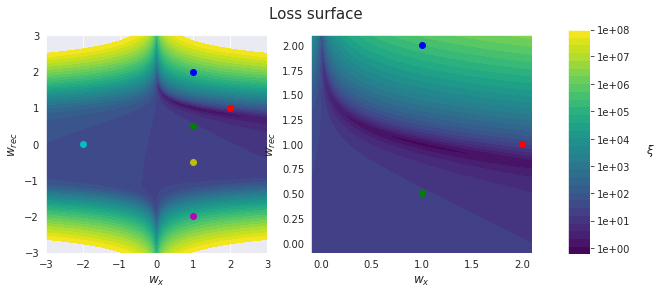

In [ ]:
# Get and plot the loss surface figure with markers
fig = get_loss_surface_figure(lambda w1, w2: loss(forward_states(X, w1, w2)[:,-1] , Y), points)

Ques 4. Observing instablity in backward prop

In [ ]:
def gradient_time(points, get_grad_over_time):
   #From the mentioned points above we'll observe how backprop is behaving
    
    fig = plt.figure(figsize=(6, 4))
    ax = plt.subplot(111)
    # Plot points
    for w_x, w_Rec, colour in points:
        grad_over_time = get_grad_over_time(w_x, w_Rec)
        x = np.arange(-grad_over_time.shape[1]+1, 1, 1)
        plt.plot(
            x, np.sum(grad_over_time, axis=0), colour+'-', 
            label=f'({w_x}, {w_Rec})', linewidth=1, markersize=8)
    plt.xlim(0, -grad_over_time.shape[1]+1)
    # Set up plot axis
    plt.xticks(x)
    plt.yscale('symlog')
    plt.yticks([10**8, 10**6, 10**4, 10**2, 0, -10**2, -10**4, 
                -10**6, -10**8])
    plt.xlabel('timestep k', fontsize=12)
    plt.ylabel('$\\frac{\\partial \\xi}{\\partial S_{k}}$', 
               fontsize=20, rotation=0)
    plt.title(('Unstability of gradient in backward propagation.'
               '\n(backpropagate from left to right)'))
    # Set legend
    leg = plt.legend(
        loc='center left', bbox_to_anchor=(1, 0.5), 
        frameon=False, numpoints=1)
    leg.set_title('$(w_x, w_{rec})$', prop={'size':15})
    fig.subplots_adjust(right=0.8)
    

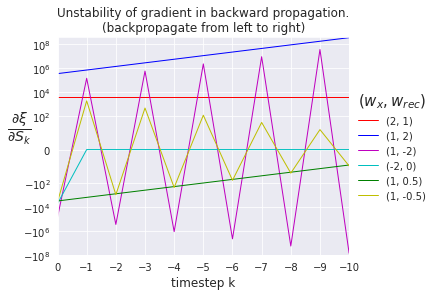

In [ ]:
def get_grad_over_time(w_x, w_Rec):
    """Helper func to only get the gradient over time 
    from wx and wRec."""
    hidden_states = forward_states(X, w_x, w_Rec)
    grad_out = output_gradient(hidden_states[:,-1], Y).sum()
    _, grad_over_time = backward_pass(X, hidden_states, grad_out, w_Rec)
    return grad_over_time

# Get the plots of the gradients changing by backpropagating.
gradient_time(points, get_grad_over_time)
# Show figures
plt.show()
plt.show()

As we observe from the above graph as |wRec| > 1, the gradient starts exploding as the data increases which can be seen in blue(1, 2) and purple(1, -2) curve.

The gradient of a state $S_k$ between a state $m$ timesteps back ($S_{k-m}$) is written as:

$$
\frac{\partial S_{k}}{\partial S_{k-m}} 
= \frac{\partial S_{k}}{\partial S_{k-1}} \cdot \cdots \cdot \frac{\partial S_{k-m+1}}{\partial S_{k-m}} = w_{rec}^m
$$


 It can also be seen that the curve strictly follows the above formula that we stated where gradient strictly depends on the value of wRec. As it becomes 1, the gradient remains contant which can be observed in the coordinate (2, 1).

Ques 5. Using Rprop as an optimization algorithm

In [ ]:
# Define Rprop optimisation function
def update_rprop(X, Y, W, W_prev_sign, W_delta, eta_p, eta_n):
  
    # Perform forward and backward pass to get the gradients
    hidden_states = forward_pass(X, W[0], W[1])
    grad_out = output_gradient(hidden_states[:,-1], Y)
    W_grads, _ = backward_pass(X, hidden_states, grad_out, W[1])
    W_sign = np.sign(W_grads)  # Sign of new gradient
    # Update the Delta (update value) for each weight 
    #  parameter seperately
    for i, _ in enumerate(W):
        if W_sign[i] == W_prev_sign[i]:
            W_delta[i] *= eta_p
        else:
            W_delta[i] *= eta_n
    return W_delta, W_sign
# Perform Rprop optimisation

# Set hyperparameters
eta_p = 1.2
eta_n = 0.5

# Set initial parameters
W = [w_x, w_Rec]
W_delta = [0.001, 0.001]  # Update values (Delta) for W
W_sign = [0, 0]  # Previous sign of W

ls_of_ws = [(W[0], W[1])]  # List of weights to plot
# Iterate over 500 iterations
for i in range(500):
    # Get the update values and sign of the last gradient
    W_delta, W_sign = update_rprop(X, Y, W, W_sign, W_delta, eta_p, eta_n)
    # Update each weight parameter seperately
    for i, _ in enumerate(W):
        W[i] -= W_sign[i] * W_delta[i]
    ls_of_ws.append((W[0], W[1]))  # Add weights to list to plot

print(f'Final weights are: wx = {W[0]:.4f},  wRec = {W[1]:.4f}')

Final weights are: wx = 1.0014,  wRec = 0.9997


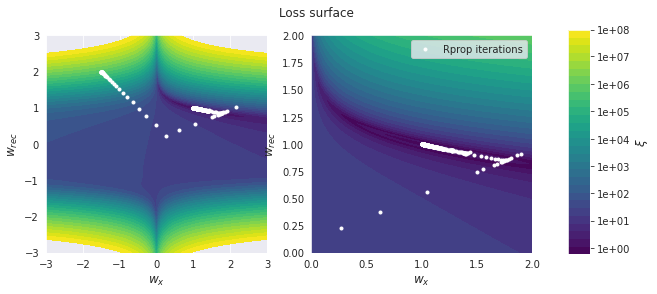

In [ ]:
# Plot the loss surface with the weights over the iterations.

# Define plot function
def plot_optimisation(ls_of_ws, loss_func):
    """Plot the optimisation iterations on the loss surface."""
    ws1, ws2 = zip(*ls_of_ws)
    # Plot figures
    fig = plt.figure(figsize=(10, 4))
    # Plot overview of loss function
    ax_1 = fig.add_subplot(1, 2, 1)
    ws1_1, ws2_1, loss_ws_1 = get_loss_surface(
        -3, 3, -3, 3, 100, loss_func)
    surf_1 = plot_surface(ax_1, ws1_1, ws2_1, loss_ws_1 + 1)
    ax_1.plot(ws1, ws2, 'wo', markersize=3)
    ax_1.set_xlim([-3, 3])
    ax_1.set_ylim([-3, 3])
    # Plot zoom of loss function
    ax_2 = fig.add_subplot(1, 2, 2)
    ws1_2, ws2_2, loss_ws_2 = get_loss_surface(
        0, 2, 0, 2, 100, loss_func)
    surf_2 = plot_surface(ax_2, ws1_2, ws2_2, loss_ws_2 + 1)
    ax_2.set_xlim([0, 2])
    ax_2.set_ylim([0, 2])
    surf_2 = plot_surface(ax_2, ws1_2, ws2_2, loss_ws_2)
    ax_2.plot(ws1, ws2, 'wo', 
              label='Rprop iterations', markersize=3)
    ax_2.legend()
    # Show the colorbar
    fig.subplots_adjust(right=0.8)
    cax = fig.add_axes([0.85, 0.12, 0.03, 0.78])
    cbar = fig.colorbar(surf_1, ticks=np.logspace(0, 8, 9), cax=cax)
    cbar.ax.set_ylabel('$\\xi$', fontsize=12)
    cbar.set_ticklabels(
        ['{:.0e}'.format(i) for i in np.logspace(0, 8, 9)])
    plt.suptitle('Loss surface', fontsize=12)
    plt.show()
    
# Plot the optimisation
plot_optimisation(
    ls_of_ws, lambda w1, w2: loss(forward_states(X, w1, w2)[:,-1] , Y))
plt.show()
#

In [ ]:
print(X)
print(Y)

[[0. 1. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 1. 0. 1. 0. 1. 0. 0.]
 [1. 1. 0. 1. 1. 1. 0. 0. 0. 1.]
 [0. 0. 1. 1. 1. 0. 1. 1. 0. 1.]
 [1. 1. 0. 1. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 1. 0. 1. 1.]
 [0. 0. 1. 0. 0. 1. 1. 1. 1. 1.]
 [1. 0. 0. 1. 0. 0. 1. 0. 1. 1.]
 [1. 1. 1. 0. 0. 1. 0. 1. 1. 1.]
 [0. 1. 0. 1. 0. 0. 1. 1. 0. 1.]
 [0. 1. 1. 0. 1. 1. 0. 1. 1. 1.]
 [0. 0. 1. 1. 0. 1. 1. 1. 1. 0.]
 [0. 0. 0. 0. 1. 1. 1. 1. 0. 0.]
 [1. 1. 1. 0. 1. 0. 1. 0. 1. 1.]
 [1. 0. 0. 0. 0. 0. 0. 1. 1. 0.]
 [0. 1. 1. 0. 0. 1. 0. 1. 1. 1.]
 [0. 0. 1. 1. 0. 0. 0. 0. 1. 1.]
 [0. 1. 1. 0. 1. 1. 1. 0. 0. 0.]
 [1. 0. 1. 0. 0. 1. 0. 1. 1. 1.]
 [0. 0. 1. 1. 1. 1. 0. 0. 1. 1.]]
[2. 4. 6. 6. 4. 4. 6. 5. 7. 5. 7. 6. 4. 7. 3. 6. 4. 5. 6. 6.]


**DATA PREPROCESSING**

In [ ]:
f = open('/content/drive/My Drive/Colab Notebooks/translation/hin.txt', mode = 'r', encoding = 'utf-8')

In [ ]:
content = f.read()

In [ ]:
print(content)

Wow!	वाह!	CC-BY 2.0 (France) Attribution: tatoeba.org #52027 (Zifre) & #6179147 (fastrizwaan)
Help!	बचाओ!	CC-BY 2.0 (France) Attribution: tatoeba.org #435084 (lukaszpp) & #459377 (minshirui)
Jump.	उछलो.	CC-BY 2.0 (France) Attribution: tatoeba.org #631038 (Shishir) & #6179121 (fastrizwaan)
Jump.	कूदो.	CC-BY 2.0 (France) Attribution: tatoeba.org #631038 (Shishir) & #6179122 (fastrizwaan)
Jump.	छलांग.	CC-BY 2.0 (France) Attribution: tatoeba.org #631038 (Shishir) & #6179123 (fastrizwaan)
Hello!	नमस्ते।	CC-BY 2.0 (France) Attribution: tatoeba.org #373330 (CK) & #480306 (minshirui)
Hello!	नमस्कार।	CC-BY 2.0 (France) Attribution: tatoeba.org #373330 (CK) & #480307 (minshirui)
Cheers!	वाह-वाह!	CC-BY 2.0 (France) Attribution: tatoeba.org #487006 (human600) & #6179113 (fastrizwaan)
Cheers!	चियर्स!	CC-BY 2.0 (France) Attribution: tatoeba.org #487006 (human600) & #6179114 (fastrizwaan)
Got it?	समझे कि नहीं?	CC-BY 2.0 (France) Attribution: tatoeba.org #455353 (FeuDRenais) & #494183 (minshirui)
I'm 

In [ ]:
f.close()

In [ ]:
f = open('/content/drive/My Drive/Colab Notebooks/translation/hin.txt', mode = 'r', encoding = 'utf-8')

In [ ]:
f1 = open('/content/drive/My Drive/Colab Notebooks/translation/hin_copy.txt', mode = 'w', encoding = 'utf-8')

Ques 1. Converting all sentence to lowercase

In [ ]:
for line in f.readlines():
    f1.write(line.lower())

f1.close()
f.close()

In [ ]:
f1 = open('/content/drive/My Drive/Colab Notebooks/translation/hin_copy.txt', mode = 'r', encoding = 'utf-8')
content_f1 = f1.read()
print(content_f1)

wow!	वाह!	cc-by 2.0 (france) attribution: tatoeba.org #52027 (zifre) & #6179147 (fastrizwaan)
help!	बचाओ!	cc-by 2.0 (france) attribution: tatoeba.org #435084 (lukaszpp) & #459377 (minshirui)
jump.	उछलो.	cc-by 2.0 (france) attribution: tatoeba.org #631038 (shishir) & #6179121 (fastrizwaan)
jump.	कूदो.	cc-by 2.0 (france) attribution: tatoeba.org #631038 (shishir) & #6179122 (fastrizwaan)
jump.	छलांग.	cc-by 2.0 (france) attribution: tatoeba.org #631038 (shishir) & #6179123 (fastrizwaan)
hello!	नमस्ते।	cc-by 2.0 (france) attribution: tatoeba.org #373330 (ck) & #480306 (minshirui)
hello!	नमस्कार।	cc-by 2.0 (france) attribution: tatoeba.org #373330 (ck) & #480307 (minshirui)
cheers!	वाह-वाह!	cc-by 2.0 (france) attribution: tatoeba.org #487006 (human600) & #6179113 (fastrizwaan)
cheers!	चियर्स!	cc-by 2.0 (france) attribution: tatoeba.org #487006 (human600) & #6179114 (fastrizwaan)
got it?	समझे कि नहीं?	cc-by 2.0 (france) attribution: tatoeba.org #455353 (feudrenais) & #494183 (minshirui)
i'm 

In [ ]:
f1.close()

In [ ]:
import re

Ques 2. Insert punctuations by space

In [ ]:
f1 = open('/content/drive/My Drive/Colab Notebooks/translation/hin_copy.txt', mode = 'r', encoding = 'utf-8')
f2 = open('/content/drive/My Drive/Colab Notebooks/translation/modified.txt', mode = 'w', encoding = 'utf-8')

for line in f1.readlines():
    line = re.compile(r'(\S+)').split(line)
    line = line[-1:0:-1]
    index = line.index('\t')
    line = line[index+1:]
    line = line[::-1]
    line = "".join(line)
    arr = list(line)[:-1]
    arr = "".join(arr)

    f2.write(re.sub(r'[!.,?\'\"]', ' ', arr))
    f2.write("\n")

f2.close()
f1.close()

In [ ]:
f.close()

In [ ]:
f2 = open('/content/drive/My Drive/Colab Notebooks/translation/modified.txt', mode = 'r', encoding = 'utf-8')
content_f2 = f2.read()
print(content_f2)

f2.close()

wow 	वाह
help 	बचाओ
jump 	उछलो
jump 	कूदो
jump 	छलांग
hello 	नमस्ते
hello 	नमस्कार
cheers 	वाह-वाह
cheers 	चियर्स
got it 	समझे कि नहीं
i m ok 	मैं ठीक हूँ
awesome 	बहुत बढ़िया
come in 	अंदर आ जाओ
get out 	बाहर निकल जाओ
go away 	चले जाओ
goodbye 	ख़ुदा हाफ़िज़
perfect 	उत्तम
perfect 	सही
welcome 	आपका स्वागत है
welcome 	स्वागतम्
have fun 	मज़े करना
have fun 	मौज करना
have fun 	मज़े करो
i forgot 	मैं भूल गया
i forgot 	मैं भूल गई
i ll pay 	मैं पैसे दूंगा
i m fine 	मैं ठीक हूँ
i m full 	मेरा पेट भर गया है
let s go 	चलो चलें
answer me 	मुझे जवाब दो
birds fly 	पंछी उड़ते हैं
excuse me 	माफ़ कीजिए
fantastic 	बहुत ख़ूब
i fainted 	मैं बेहोश हो गया
i fear so 	खेद की बात है  लेकिन वैसा ही है
i laughed 	मैं हँसा
i m bored 	मैं बोर हो रहा हूँ
i m broke 	मेरा दीवालिया हो चुका है
i m tired 	मैं थक गया हूँ
it s cold 	ठंड हो रही है
well done 	शाबाश
who knows 	कौन जाने
who knows 	किसको पता है
who knows 	किसे पता है
who knows 	किसे मालूम है
wonderful 	अद्भु
birds sing 	पंछी गाते हैं
come on in 	अंदर आ जाओ

Ques 3 & 4. Applying start and end token to each sentence

In [ ]:
f2 = open('/content/drive/My Drive/Colab Notebooks/translation/modified.txt', mode = 'r', encoding = 'utf-8')
f3 = open('/content/drive/My Drive/Colab Notebooks/translation/modified1.txt', mode = 'w', encoding = 'utf-8')

for line in f2.readlines():
    line = re.compile(r'(\S+)').split(line)
    line = line[:-1]
    line.append(' <end>')
    line.insert(0, '<start> ') 
    if(' \t' in line):
      index = line.index(' \t')
      line[index] = '\t'
    elif('  \t ' in line):
      index = line.index('  \t ')
      line[index]='\t'
 
    line.insert(index, ' <end>') 
    line.insert(index+2, '<start> ') 


    line = "".join(line)
    
    print(line)
    f3.write(line)
    f3.write("\n")



<start> wow <end>	<start> वाह <end>
<start> help <end>	<start> बचाओ <end>
<start> jump <end>	<start> उछलो <end>
<start> jump <end>	<start> कूदो <end>
<start> jump <end>	<start> छलांग <end>
<start> hello <end>	<start> नमस्ते <end>
<start> hello <end>	<start> नमस्कार <end>
<start> cheers <end>	<start> वाह-वाह <end>
<start> cheers <end>	<start> चियर्स <end>
<start> got it <end>	<start> समझे कि नहीं <end>
<start> i m ok <end>	<start> मैं ठीक हूँ <end>
<start> awesome <end>	<start> बहुत बढ़िया <end>
<start> come in <end>	<start> अंदर आ जाओ <end>
<start> get out <end>	<start> बाहर निकल जाओ <end>
<start> go away <end>	<start> चले जाओ <end>
<start> goodbye <end>	<start> ख़ुदा हाफ़िज़ <end>
<start> perfect <end>	<start> उत्तम <end>
<start> perfect <end>	<start> सही <end>
<start> welcome <end>	<start> आपका स्वागत है <end>
<start> welcome <end>	<start> स्वागतम् <end>
<start> have fun <end>	<start> मज़े करना <end>
<start> have fun <end>	<start> मौज करना <end>
<start> have fun <end>	<start> मज़े कर

In [ ]:
f3 = open('/content/drive/My Drive/Colab Notebooks/translation/modified1.txt', mode = 'r', encoding = 'utf-8')
content_f3 = f3.read()
print(content_f3)

f3.close()

<start> wow <end>	<start> वाह <end>
<start> help <end>	<start> बचाओ <end>
<start> jump <end>	<start> उछलो <end>
<start> jump <end>	<start> कूदो <end>
<start> jump <end>	<start> छलांग <end>
<start> hello <end>	<start> नमस्ते <end>
<start> hello <end>	<start> नमस्कार <end>
<start> cheers <end>	<start> वाह-वाह <end>
<start> cheers <end>	<start> चियर्स <end>
<start> got it <end>	<start> समझे कि नहीं <end>
<start> i m ok <end>	<start> मैं ठीक हूँ <end>
<start> awesome <end>	<start> बहुत बढ़िया <end>
<start> come in <end>	<start> अंदर आ जाओ <end>
<start> get out <end>	<start> बाहर निकल जाओ <end>
<start> go away <end>	<start> चले जाओ <end>
<start> goodbye <end>	<start> ख़ुदा हाफ़िज़ <end>
<start> perfect <end>	<start> उत्तम <end>
<start> perfect <end>	<start> सही <end>
<start> welcome <end>	<start> आपका स्वागत है <end>
<start> welcome <end>	<start> स्वागतम् <end>
<start> have fun <end>	<start> मज़े करना <end>
<start> have fun <end>	<start> मौज करना <end>
<start> have fun <end>	<start> मज़े कर

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
#tokenization function
def tokenize(language):
    lang = Tokenizer(filters = '')
    lang.fit_on_texts(language)  # Updating internal vocabulary based on a list of texts
    seq = lang.texts_to_sequences(language)  # Transforms each text in texts to a sequence of integers.
    return seq, lang

In [ ]:
#applying padding to each sentence.
def pad():
    eng_val = length()[0][0]
    hin_val = length()[1][0]
    
    eng_data = dataset()[1]
    hin_data = dataset()[2]
    
    d1 = []
    d2 = []
    for i in range(len(eng_data)):
        val=len(eng_data[i].split())

        t = eng_val - val
        data = eng_data[i].split()
        
        for i in range(t):
            data.insert(val-1, '<pad>')
        
        data = " ".join(data)
        d1.append(data)
        
    for i in range(len(hin_data)):
        val=len(hin_data[i].split())

        t = hin_val - val
        data1 = hin_data[i].split()
        
        for i in range(t):
            data1.insert(val-1, '<pad>')
        
        data1 = " ".join(data1)
        d2.append(data1)
        
    return(d1, d2)
        
print(pad())

(['<start> wow <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <end>', '<start> help <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <end>', '<start> jump <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <end>', '<start> jump <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <end>', '<start> jump <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <end>', '<start> hello <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <end>', '<start> hello <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad>

In [ ]:
def pad_sentence(sentence):
    
    d1 = []
    val=len(sentence.split())
    eng_val = length()[0][0]
    t = eng_val - val
    data = list(sentence.split())

    for i in range(t):
      data.insert(val-1, '<pad>')

    data = " ".join(data)
    d1.append(data)
        
        
    return(d1)
        
print(tokenize(pad_sentence('hi i am sam')))

([[2, 3, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5]], <keras_preprocessing.text.Tokenizer object at 0x7f522c056dd8>)


In [ ]:
#generating dataset
def dataset():
    f3 = open('/content/drive/My Drive/Colab Notebooks/translation/modified1.txt', mode = 'r', encoding = 'utf-8')
    content = f3.read().strip().split('\n')
    eng_data = []
    hin_data = []
    for line in content:
        eng, hin = line.split('\t')
        eng_data.append(eng)
        hin_data.append(hin)
    return(list(zip(eng_data, hin_data)), eng_data, hin_data)

    f3.close()
dataset()[1]

['<start> wow <end>',
 '<start> help <end>',
 '<start> jump <end>',
 '<start> jump <end>',
 '<start> jump <end>',
 '<start> hello <end>',
 '<start> hello <end>',
 '<start> cheers <end>',
 '<start> cheers <end>',
 '<start> got it <end>',
 '<start> i m ok <end>',
 '<start> awesome <end>',
 '<start> come in <end>',
 '<start> get out <end>',
 '<start> go away <end>',
 '<start> goodbye <end>',
 '<start> perfect <end>',
 '<start> perfect <end>',
 '<start> welcome <end>',
 '<start> welcome <end>',
 '<start> have fun <end>',
 '<start> have fun <end>',
 '<start> have fun <end>',
 '<start> i forgot <end>',
 '<start> i forgot <end>',
 '<start> i ll pay <end>',
 '<start> i m fine <end>',
 '<start> i m full <end>',
 '<start> let s go <end>',
 '<start> answer me <end>',
 '<start> birds fly <end>',
 '<start> excuse me <end>',
 '<start> fantastic <end>',
 '<start> i fainted <end>',
 '<start> i fear so <end>',
 '<start> i laughed <end>',
 '<start> i m bored <end>',
 '<start> i m broke <end>',
 '<start>

Ques 5. Tokenizing the unpaded data

In [ ]:
#applying tokenization to the input data
def tokenize_data():
    eng_token = []
    hin_token = []
    for data in dataset()[0]:
        eng_token.append(data[0].split())
        hin_token.append(data[1].split())
    return(tokenize(eng_token)[0], tokenize(hin_token)[0])

print(tokenize_data())

([[1, 1244, 2], [1, 89, 2], [1, 539, 2], [1, 539, 2], [1, 539, 2], [1, 882, 2], [1, 882, 2], [1, 883, 2], [1, 883, 2], [1, 131, 13, 2], [1, 4, 43, 884, 2], [1, 1245, 2], [1, 51, 11, 2], [1, 69, 58, 2], [1, 38, 164, 2], [1, 1246, 2], [1, 885, 2], [1, 885, 2], [1, 886, 2], [1, 886, 2], [1, 18, 276, 2], [1, 18, 276, 2], [1, 18, 276, 2], [1, 4, 340, 2], [1, 4, 340, 2], [1, 4, 62, 451, 2], [1, 4, 43, 887, 2], [1, 4, 43, 1247, 2], [1, 88, 24, 38, 2], [1, 178, 16, 2], [1, 387, 341, 2], [1, 388, 16, 2], [1, 1248, 2], [1, 4, 1249, 2], [1, 4, 1250, 109, 2], [1, 4, 540, 2], [1, 4, 43, 667, 2], [1, 4, 43, 277, 2], [1, 4, 43, 165, 2], [1, 13, 24, 278, 2], [1, 132, 342, 2], [1, 90, 279, 2], [1, 90, 279, 2], [1, 90, 279, 2], [1, 90, 279, 2], [1, 668, 2], [1, 387, 541, 2], [1, 51, 31, 11, 2], [1, 1251, 2], [1, 32, 12, 389, 2], [1, 343, 1252, 2], [1, 669, 34, 2], [1, 4, 30, 344, 2], [1, 4, 30, 344, 2], [1, 4, 222, 6, 2], [1, 4, 222, 6, 2], [1, 4, 222, 6, 2], [1, 4, 222, 6, 2], [1, 4, 222, 6, 2], [1, 4,

Ques 6. Applying padding to the data along with tokenization

In [ ]:
#applying tokenization to the paded data 
def paded_data():
    eng_token = []
    hin_token = []
    for line in pad()[0]:
        eng_token.append(line.split())
    
    for line in pad()[1]:
        hin_token.append(line.split())
        
    return(tokenize(eng_token)[0], tokenize(hin_token)[0], tokenize(eng_token)[1], tokenize(hin_token)[1])


print(paded_data()[1])

[[3, 1403, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2], [3, 1404, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2], [3, 1405, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2], [3, 943, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2], [3, 1406, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2], [3, 1407, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2], [3, 1408, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2], [3, 1409, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2], [3, 1410, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2], [3, 944, 30, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2], [3, 7, 164, 18, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2], [3, 19, 1411, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [ ]:
#generating max length by computing length of each line
def length():
    for data in dataset()[0]:
        eng_max_len = []
        hin_max_len = []

        eng_max_len.append(len((data[0]).split()))
        hin_max_len.append(len((data[1]).split()))

    return(eng_max_len, hin_max_len)
print(length())

([25], [27])


In [ ]:
print(paded_data()[1])

[[3, 1403, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2], [3, 1404, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2], [3, 1405, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2], [3, 943, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2], [3, 1406, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2], [3, 1407, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2], [3, 1408, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2], [3, 1409, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2], [3, 1410, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2], [3, 944, 30, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2], [3, 7, 164, 18, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2], [3, 19, 1411, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [ ]:
from sklearn.model_selection import train_test_split

Ques 7. Converting a random instance from token sequence into words

In [ ]:
paded_data()[2].word_index

{'<pad>': 1,
 '<start>': 2,
 '<end>': 3,
 'the': 4,
 'i': 5,
 'to': 6,
 'you': 7,
 'is': 8,
 'a': 9,
 'he': 10,
 'of': 11,
 'in': 12,
 't': 13,
 'it': 14,
 'my': 15,
 'she': 16,
 'me': 17,
 'this': 18,
 'have': 19,
 'was': 20,
 'for': 21,
 'that': 22,
 'are': 23,
 'do': 24,
 's': 25,
 'his': 26,
 'what': 27,
 'we': 28,
 'your': 29,
 'will': 30,
 'can': 31,
 'on': 32,
 'don': 33,
 'at': 34,
 'him': 35,
 'her': 36,
 'not': 37,
 'like': 38,
 'go': 39,
 'with': 40,
 'be': 41,
 'how': 42,
 'and': 43,
 'm': 44,
 'there': 45,
 'has': 46,
 'know': 47,
 'time': 48,
 'up': 49,
 'all': 50,
 'they': 51,
 'come': 52,
 'very': 53,
 'as': 54,
 'had': 55,
 'please': 56,
 'from': 57,
 'by': 58,
 'out': 59,
 'want': 60,
 'did': 61,
 'when': 62,
 'll': 63,
 'am': 64,
 'here': 65,
 'no': 66,
 'father': 67,
 'been': 68,
 'going': 69,
 'get': 70,
 'take': 71,
 'an': 72,
 'book': 73,
 'about': 74,
 'one': 75,
 'where': 76,
 'if': 77,
 'tom': 78,
 'were': 79,
 'money': 80,
 'india': 81,
 'would': 82,
 'long':

In [ ]:
paded_data()[3].word_index

{'<pad>': 1,
 '<end>': 2,
 '<start>': 3,
 'है': 4,
 'में': 5,
 'नहीं': 6,
 'मैं': 7,
 'वह': 8,
 'से': 9,
 'हैं': 10,
 'के': 11,
 'मुझे': 12,
 'क्या': 13,
 'को': 14,
 'हो': 15,
 'की': 16,
 'था': 17,
 'हूँ': 18,
 'बहुत': 19,
 'का': 20,
 'उसने': 21,
 'पर': 22,
 'तुम': 23,
 'यह': 24,
 'एक': 25,
 'लिए': 26,
 'कर': 27,
 'मेरे': 28,
 'गया': 29,
 'कि': 30,
 'और': 31,
 'उसे': 32,
 'इस': 33,
 'भी': 34,
 'मेरी': 35,
 'अपने': 36,
 'मैंने': 37,
 'रहा': 38,
 'ने': 39,
 'तो': 40,
 'पास': 41,
 'करने': 42,
 'अपनी': 43,
 'कल': 44,
 'ही': 45,
 'हम': 46,
 'थी': 47,
 'काम': 48,
 'किया': 49,
 'दिया': 50,
 'कोई': 51,
 'सकते': 52,
 'उसके': 53,
 'तुम्हारे': 54,
 'उसकी': 55,
 'करना': 56,
 'सकता': 57,
 'थे': 58,
 'घर': 59,
 'तुम्हें': 60,
 'चाहिए': 61,
 'पता': 62,
 'साथ': 63,
 'उस': 64,
 'मेरा': 65,
 'रही': 66,
 'समय': 67,
 'दो': 68,
 'बात': 69,
 'हुई': 70,
 'गए': 71,
 'आज': 72,
 'हुआ': 73,
 'आप': 74,
 'तुम्हे': 75,
 'उसको': 76,
 'बजे': 77,
 'तक': 78,
 'मत': 79,
 'लगता': 80,
 'होगा': 81,
 'गई': 82,
 'किताब': 83,

Ques 8. Spliting the dataset in 80% / 20%  to get train and test sets

In [ ]:
input_tensor_train, input_tensor_test, target_tensor_train, target_tensor_test = train_test_split(paded_data()[0], paded_data()[1], test_size=0.2)

In [ ]:
def max_length(tensor):
    return max(len(t) for t in tensor)

In [ ]:
max_length_targ, max_length_inp = max_length(paded_data()[1]), max_length(paded_data()[0])

In [ ]:
input_tensor_train

[[2,
  15,
  338,
  19,
  298,
  623,
  34,
  4,
  302,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  3],
 [2,
  51,
  254,
  6,
  70,
  290,
  54,
  188,
  54,
  51,
  138,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  3],
 [2,
  4,
  1469,
  1470,
  334,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  3],
 [2,
  5,
  44,
  54,
  696,
  54,
  7,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  3],
 [2,
  9,
  95,
  94,
  105,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  3],
 [2,
  76,
  25,
  4,
  573,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  3],
 [2,
  5,
  47,
  42,
  6,
  196,
  9,
  101,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  3],
 [2,
  28,
  233,
  9,
  1417,
  605,
  1,
  1,
  1,
  1,
  1,
  1,

In [ ]:
input_tensor_test

[[2,
  5,
  33,
  13,
  170,
  35,
  34,
  50,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  3],
 [2,
  9,
  1174,
  82,
  37,
  1970,
  32,
  4,
  657,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  3],
 [2,
  4,
  85,
  651,
  19,
  9,
  156,
  12,
  1177,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  3],
 [2,
  136,
  86,
  9,
  1930,
  31,
  1931,
  36,
  102,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  3],
 [2,
  7,
  23,
  109,
  397,
  6,
  125,
  311,
  11,
  333,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  3],
 [2,
  283,
  96,
  12,
  4,
  934,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  3],
 [2,
  201,
  597,
  1397,
  482,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  3],
 [2,
  5,
  19,
  9,
  735,
  1432,
  1,
  1,
  1,

**MACHINE TRANSLATION**

Ques 1. Building an encoder.

In [ ]:
import tensorflow as tf

We'll import GRU to build our encoder

In [ ]:
from tensorflow.keras.layers import GRU
from tensorflow.keras import Model
from tensorflow.data import Dataset
from tensorflow.nn import softmax
from tensorflow.nn import tanh
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy

Ques 1. Implementing Encoder

Source: https://www.tensorflow.org/tutorials/text/nmt_with_attention

In [ ]:
class Encoder(Model):
    def __init__(self, vocab_size, embedding_dim, encoder_units, batch_size):

        super(Encoder, self).__init__()
        self.batch_size = batch_size
        self.encoder_units = encoder_units
        
        self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim) 
        #creating the embeddings to embed higher dimensional data into lower dimensional vector space.
        
        #implementing GRU
        self.gru = GRU(self.encoder_units,
                    return_sequences=True,
                    return_state=True,
                    recurrent_initializer='glorot_uniform')
        """
        Here glorot_uniform draws samples from a uniform distribution within [-limit, limit],
        where limit = sqrt(6 / (fan_in + fan_out)) (fan_in is the number of input units in the weight tensor and fan_out is the number of output units).
        It is used for the linear transformation of the recurrent state.
        
        Here encoder units represents the dimensionality of the output space.
        
        """
    def call(self, x, hidden): #calling the hidden state to implement GRU
        x = self.embedding(x)
        output, state = self.gru(x, initial_state = hidden)
        return output, state

    def initialize_hidden_state(self):
        return tf.zeros((self.batch_size, self.encoder_units))

In [ ]:
#length of input tensor train
train_inp_len = len(input_tensor_train)
print(train_inp_len)

2219


In [ ]:
batch_size = 64     #batch size
steps_per_epoch = len(input_tensor_train)//batch_size    #steps taken in each epochs
print(steps_per_epoch)

34


In [ ]:
#total embedding dimensions of tensor
embedding_dim = 256
units = 1024

In [ ]:
#vocabulary size of input = English and target = Hindi
vocab_inp_size = len(paded_data()[2].word_index)+1
vocab_tar_size = len(paded_data()[3].word_index)+1

print(vocab_inp_size, vocab_tar_size)

2361 2872


In [ ]:
#We iterate over the elements of the dataset, with their tensors converted to numpy arrays.
data_set = Dataset.from_tensor_slices((input_tensor_train, target_tensor_train)).shuffle(train_inp_len) 
data_set = data_set.batch(batch_size, drop_remainder=True)
print(data_set)

<BatchDataset shapes: ((64, 25), (64, 27)), types: (tf.int32, tf.int32)>


In [ ]:
example_input_batch, example_target_batch = next(iter(data_set))
example_input_batch.shape, example_target_batch.shape

(TensorShape([64, 25]), TensorShape([64, 27]))

In [ ]:
encoder = Encoder(vocab_inp_size, embedding_dim, units, batch_size)

# calling the initialize_hidden_state function
sample_hidden = encoder.initialize_hidden_state()
sample_output, sample_hidden = encoder(example_input_batch, sample_hidden)
print ('Encoder output shape: (batch size, sequence length, units) {}'.format(sample_output.shape))
print ('Encoder Hidden state shape: (batch size, units) {}'.format(sample_hidden.shape))

Encoder output shape: (batch size, sequence length, units) (64, 25, 1024)
Encoder Hidden state shape: (batch size, units) (64, 1024)


Ques 2. Implementing attention Mechanism by Bahdanau

In [ ]:
class BahdanauAttention(Model):
    def __init__(self, units):
        super(BahdanauAttention, self).__init__()
        self.W1 = tf.keras.layers.Dense(units)
        self.W2 = tf.keras.layers.Dense(units)
        self.V = tf.keras.layers.Dense(1)

    def call(self, query, values):
        # hidden shape == (batch_size, hidden size)
        # hidden_with_time_axis shape == (batch_size, 1, hidden size)
        # we are doing this to perform addition to calculate the score
        hidden_with_time_axis = tf.expand_dims(query, 1)

        # score shape == (batch_size, max_length, 1)
        # we get 1 at the last axis because we are applying score to self.V
        # the shape of the tensor before applying self.V is (batch_size, max_length, units)
        score = self.V(tanh(self.W1(values) + self.W2(hidden_with_time_axis)))

        # assigning attention_weights of shape == (batch_size, max_length, 1)
        attention_weights = softmax(score, axis=1)  

        # context_vector shape after sum == (batch_size, hidden_size)
        context_vector = attention_weights * values
        context_vector = tf.reduce_sum(context_vector, axis=1)

        return context_vector, attention_weights

In [ ]:
attention_layer = BahdanauAttention(10)
attention_result, attention_weights = attention_layer(sample_hidden, sample_output)

print("Attention result shape: (batch size, units) {}".format(attention_result.shape))
print("Attention weights shape: (batch_size, sequence_length, 1) {}".format(attention_weights.shape))

Attention result shape: (batch size, units) (64, 1024)
Attention weights shape: (batch_size, sequence_length, 1) (64, 25, 1)


In [ ]:
class Decoder(Model):
    def __init__(self, vocab_size, embedding_dim, dec_units, batch_sz):
        super(Decoder, self).__init__()
        self.batch_sz = batch_sz
        self.dec_units = dec_units
        self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)

        #implementing GRU
        self.gru = GRU(self.dec_units,
                        return_sequences=True,
                        return_state=True,
                        recurrent_initializer='glorot_uniform')
        
        self.fc = tf.keras.layers.Dense(vocab_size) #fully connected layer

        # using attention mechanism
        self.attention = BahdanauAttention(self.dec_units)

    def call(self, x, hidden, enc_output):
        # enc_output shape == (batch_size, max_length, hidden_size)
        context_vector, attention_weights = self.attention(hidden, enc_output)

        # x shape after passing through embedding == (batch_size, 1, embedding_dim)
        x = self.embedding(x)

        # x shape after concatenation == (batch_size, 1, embedding_dim + hidden_size)
        x = tf.concat([tf.expand_dims(context_vector, 1), x], axis=-1)

        # passing the concatenated vector to the GRU
        output, state = self.gru(x)

        # output shape == (batch_size * 1, hidden_size)
        output = tf.reshape(output, (-1, output.shape[2]))

        # output shape == (batch_size, vocab)
        x = self.fc(output)

        return x, state, attention_weights

In [ ]:
decoder = Decoder(vocab_tar_size, embedding_dim, units, batch_size)

sample_decoder_output, _, _ = decoder(tf.random.uniform((64, 1)),
                                      sample_hidden, sample_output)

print ('Decoder output shape: (batch_size, vocab size) {}'.format(sample_decoder_output.shape))

Decoder output shape: (batch_size, vocab size) (64, 2872)


In [ ]:
optimizer = Adam()
loss_object = SparseCategoricalCrossentropy(
    from_logits=True, reduction='none')


#implementing loss function

def loss_function(real, pred):
    mask = tf.math.logical_not(tf.math.equal(real, 0))
    loss_ = loss_object(real, pred)

    mask = tf.cast(mask, dtype=loss_.dtype)
    loss_ *= mask

    return tf.reduce_mean(loss_)

In [ ]:
import os
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(optimizer=optimizer,
                                 encoder=encoder,
                                 decoder=decoder)

In [ ]:
@tf.function
def train_step(inp, targ, enc_hidden):
    loss = 0

    with tf.GradientTape() as tape:
        enc_output, enc_hidden = encoder(inp, enc_hidden)

        dec_hidden = enc_hidden

        dec_input = tf.expand_dims([paded_data()[3].word_index['<start>']] * batch_size, 1)

        # Teacher forcing - feeding the target as the next input
        for n in range(1, targ.shape[1]):
            # passing enc_output to the decoder
            predictions, dec_hidden, _ = decoder(dec_input, dec_hidden, enc_output)

            loss += loss_function(targ[:, n], predictions)

            # using teacher forcing
            dec_input = tf.expand_dims(targ[:, n], 1)

    batch_loss = (loss / int(targ.shape[1]))

    variables = encoder.trainable_variables + decoder.trainable_variables

    gradients = tape.gradient(loss, variables) #applying gradient tape for back propagation

    optimizer.apply_gradients(zip(gradients, variables))

    return batch_loss

In [ ]:
!pip install --upgrade tensorflow

  Using cached https://files.pythonhosted.org/packages/ad/ad/769c195c72ac72040635c66cd9ba7b0f4b4fc1ac67e59b99fa6988446c22/tensorflow-2.3.1-cp36-cp36m-manylinux2010_x86_64.whl


In [ ]:
import unicodedata
import re
import numpy as np
import os
import io


EPOCHS = int(input("Specify the epochs: "))

for epoch in range(EPOCHS):

    enc_hidden = encoder.initialize_hidden_state()
    total_loss = 0

    for (batch, (inp, targ)) in enumerate(data_set.take(steps_per_epoch)):
      batch_loss = train_step(inp, targ, enc_hidden)
      total_loss += batch_loss

      if batch % 100 == 0:
        print('Epoch {} Batch {} Loss {:.4f}'.format(epoch + 1,
                                                        batch,
                                                        batch_loss.numpy()))
    if (epoch + 1) % 2 == 0:
      checkpoint.save(file_prefix = checkpoint_prefix)

    print('Epoch {} Loss: {:.4f}'.format(epoch + 1, total_loss / steps_per_epoch))


Specify the epochs: 50
Epoch 1 Batch 0 Loss 0.1651
Epoch 1 Loss 0.1661
Epoch 2 Batch 0 Loss 0.1588
Epoch 2 Loss 0.1591
Epoch 3 Batch 0 Loss 0.1670
Epoch 3 Loss 0.1590
Epoch 4 Batch 0 Loss 0.1540
Epoch 4 Loss 0.1667
Epoch 5 Batch 0 Loss 0.1586
Epoch 5 Loss 0.1636
Epoch 6 Batch 0 Loss 0.1828
Epoch 6 Loss 0.1673
Epoch 7 Batch 0 Loss 0.1525
Epoch 7 Loss 0.1642
Epoch 8 Batch 0 Loss 0.1539
Epoch 8 Loss 0.1681
Epoch 9 Batch 0 Loss 0.1777
Epoch 9 Loss 0.1693
Epoch 10 Batch 0 Loss 0.1618
Epoch 10 Loss 0.1665
Epoch 11 Batch 0 Loss 0.1644
Epoch 11 Loss 0.1645
Epoch 12 Batch 0 Loss 0.1562
Epoch 12 Loss 0.1582
Epoch 13 Batch 0 Loss 0.1487
Epoch 13 Loss 0.2357
Epoch 14 Batch 0 Loss 0.2347
Epoch 14 Loss 0.2169
Epoch 15 Batch 0 Loss 0.1741
Epoch 15 Loss 0.1761
Epoch 16 Batch 0 Loss 0.1620
Epoch 16 Loss 0.1635
Epoch 17 Batch 0 Loss 0.1595
Epoch 17 Loss 0.1596
Epoch 18 Batch 0 Loss 0.1524
Epoch 18 Loss 0.1582
Epoch 19 Batch 0 Loss 0.1488
Epoch 19 Loss 0.1551
Epoch 20 Batch 0 Loss 0.1479
Epoch 20 Loss 0.

In [ ]:
def preprocess_sentence(w):
    w = re.sub(r"([?.!,¿])", r" \1 ", w)
    w = re.sub(r'[" "]+', " ", w)
    w = w.rstrip().strip()

    # adding a start and an end token to the sentence
    # so that the model know when to start and stop predicting.
    w = '<start> ' + w + ' <end>'
    return w


In [ ]:
def evaluate(sentence):
    attention_plot = np.zeros((max_length_targ, max_length_inp))

    sentence = preprocess_sentence(sentence)

    inputs = tokenize(pad_sentence(sentence))[0]
    #print(inputs)

    inputs = tf.convert_to_tensor(inputs)
    #print(inputs)

    result = ''

    hidden = [tf.zeros((1, units))]
    enc_out, enc_hidden = encoder(inputs, hidden)

    dec_hidden = enc_hidden
    dec_input = tf.expand_dims([paded_data()[3].word_index['<start>']], 0)

    for t in range(max_length_targ):
        predictions, dec_hidden, attention_weights = decoder(dec_input,
                                                             dec_hidden,
                                                             enc_out)

        # storing the attention weights to plot later on
        attention_weights = tf.reshape(attention_weights, (-1, ))
        attention_plot[t] = attention_weights.numpy()

        predicted_id = tf.argmax(predictions[0]).numpy()

        if paded_data()[3].index_word[predicted_id] == '<pad>':
            result = result

        elif paded_data()[3].index_word[predicted_id] == '<end>':
            result += paded_data()[3].index_word[predicted_id] + ' '
            return result, sentence, attention_plot

        else:
            result += paded_data()[3].index_word[predicted_id] + ' '

        # the predicted ID is fed back into the model
        dec_input = tf.expand_dims([predicted_id], 0)

    return result, sentence, attention_plot

In [ ]:
evaluate('how are you')

('आज मेरा नसीब में पता है ',
 '<start> how are you <end>',
 array([[6.18535068e-07, 7.02206080e-07, 7.48079231e-07, 1.21383619e-05,
         2.71215336e-03, 2.14279294e-01, 6.38094723e-01, 1.10966116e-01,
         2.34609544e-02, 3.27005866e-03, 4.82648407e-04, 4.76198620e-04,
         4.81066672e-04, 4.88164515e-04, 4.88831196e-04, 4.88041609e-04,
         4.87129291e-04, 4.86311910e-04, 4.85604687e-04, 4.84986842e-04,
         4.84433520e-04, 4.83923272e-04, 4.83441690e-04, 4.82981763e-04,
         4.18710813e-04],
        [2.48735454e-02, 2.20621694e-02, 4.36339788e-02, 2.09295422e-01,
         3.28031629e-01, 2.99257696e-01, 5.79108819e-02, 3.79909086e-03,
         5.02565119e-04, 2.63760710e-04, 5.33258601e-04, 6.14728546e-04,
         6.40581071e-04, 6.69982634e-04, 6.86791143e-04, 6.98275748e-04,
         7.07260158e-04, 7.14683498e-04, 7.21024291e-04, 7.26571947e-04,
         7.31511449e-04, 7.35966372e-04, 7.40024145e-04, 7.43748562e-04,
         7.04865030e-04],
        [1.18

In [ ]:
%matplotlib inline
def plot_attention(attention, sentence, predicted_sentence):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(1, 1, 1)
    ax.matshow(attention, cmap='viridis')

    fontdict = {'fontsize': 14}

    ax.set_xticklabels([''] + sentence, fontdict=fontdict, rotation=90)
    ax.set_yticklabels([''] + predicted_sentence, fontdict=fontdict)

    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

    plt.show()

In [ ]:
def translate(sentence):
    result, sentence, attention_plot = evaluate(sentence)

    print('Input: %s' % (sentence))
    print('Predicted translation: {}'.format(result))

    attention_plot = attention_plot[:len(result.split(' ')), :len(sentence.split(' '))]
    plot_attention(attention_plot, sentence.split(' '), result.split(' '))

In [ ]:
# restoring the latest checkpoint in checkpoint_dir
checkpoint.restore(tf.train.latest_checkpoint(checkpoint_dir))

In [ ]:
print(paded_data()[2])

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

Input: <start> i am flying <end>
Predicted translation: आज मेरा नसीब में पता है 


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2310 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2332 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2350 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2375 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2352 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2366 missing from current font.
  font.set_text(s

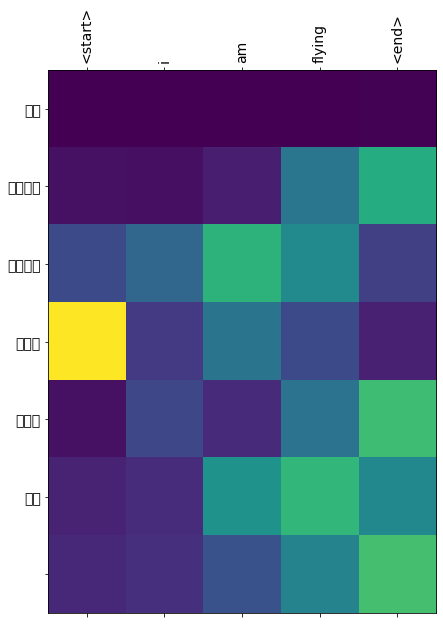

In [ ]:
translate('i am flying')